In [17]:
import pickle
import numpy as np
from os import listdir
from os.path import isfile, join
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [8]:
def print_training_stats(training_time_per_repeat, best_training_errors_per_repeat,
                         best_test_errors_per_repeat, best_validation_errors_per_repeat):
  print(f'Training time was: {training_time_per_repeat.mean():.2f}s +- {training_time_per_repeat.std():.2f}s')
  print(f'Best training error: {best_training_errors_per_repeat.max():.4f} \n'
        f'Best validation error: {best_validation_errors_per_repeat.max():.4f} \n'
        f'Best test error: {best_test_errors_per_repeat.max():.4f}')

In [9]:
def plot_train_test_val_errors(training_errors, test_errors, validation_errors, title='Forward Euler error - Cora dataset'):
  # Create dataframe for plotting
  n_repeats, n_epochs = training_errors.shape
  epoch_column = np.repeat(np.arange(0, n_epochs), n_repeats)
  epoch_column = np.tile(epoch_column, 3) # for the three types of errors
  training_error_columns = training_errors.flatten(order='F')
  test_error_columns = test_errors.flatten(order='F')
  validation_error_columns = validation_errors.flatten(order='F')
  errors = np.concatenate([training_error_columns, test_error_columns, validation_error_columns])
  error_type = np.concatenate([np.repeat(['Training'], n_epochs*n_repeats),
                               np.repeat(['Test'], n_epochs*n_repeats),
                               np.repeat(['Validation'], n_epochs*n_repeats)])


  numpy_array = np.stack([epoch_column, errors, error_type], axis=1)
  df_error = pd.DataFrame(numpy_array, columns=['epoch', 'error', 'error_type'])
  df_error.error = df_error.error.astype('float')
  df_error.epoch = df_error.epoch.astype('int')

  # Plot
  fig, ax = plt.subplots(figsize=(10,5))
  sns.lineplot(data=df_error, x='epoch', y='error', hue='error_type', ci='sd', ax=ax)
  ax.set_title(title, fontsize=20)
  ax.set_xlabel('Epoch', fontsize=16)
  ax.set_ylabel('Relative Error', fontsize=16)
  ax.legend(title='Error type', fontsize=16, title_fontsize=16)
  ax.tick_params(axis='both', which='major', labelsize=16)

In [2]:
path = "../mlggm/results/"

runfiles = [f for f in listdir(path) if isfile(join(path, f))]

runobj = []

for f in runfiles:
        with (open(join(path,f), "rb")) as openfile:
            runobj.append(pickle.load(openfile))

Implicit Adams error - Cora dataset - stepsize:0.01
Training time was: 63.71s +- 0.61s
Best training error: 1.0000 
Best validation error: 0.8080 
Best test error: 0.8230
Implicit Adams error - Cora dataset - stepsize:0.25
Training time was: 6.16s +- 0.08s
Best training error: 0.9857 
Best validation error: 0.8080 
Best test error: 0.8410
Implicit Adams error - Cora dataset - stepsize:0.5
Training time was: 4.86s +- 0.10s
Best training error: 0.9929 
Best validation error: 0.8180 
Best test error: 0.8280
Implicit Adams error - Cora dataset - stepsize:0.1
Training time was: 8.97s +- 0.06s
Best training error: 0.9857 
Best validation error: 0.8160 
Best test error: 0.8190


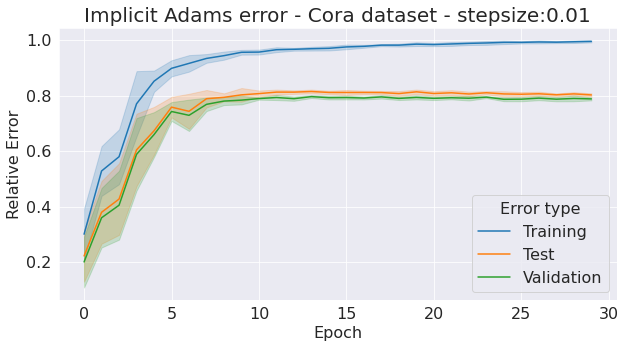

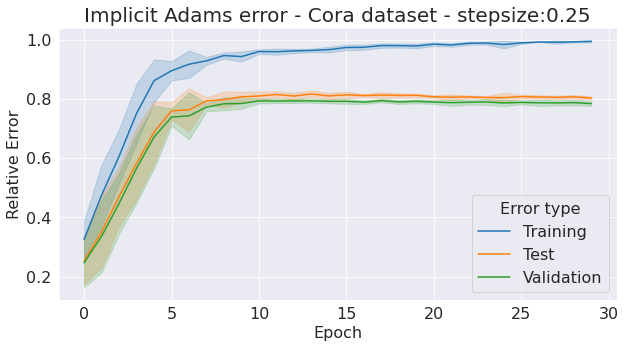

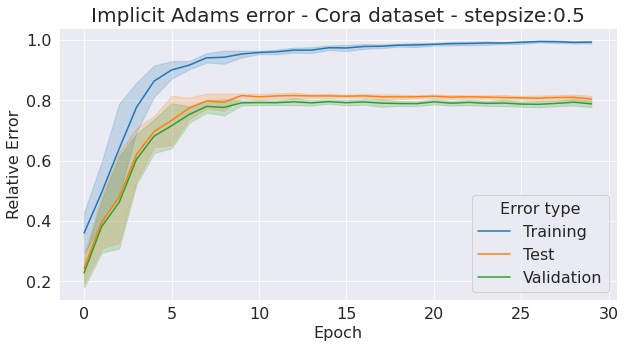

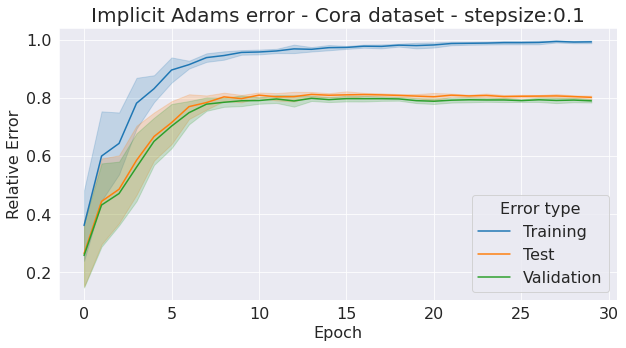

In [38]:
for i in range(len(runobj)):
    one_obj = runobj[i]
    title = f"{' '.join([x.capitalize() for x in one_obj['method'].split('_')])} error - {one_obj['name']} dataset - stepsize:{one_obj['stepsize']}"
    print(title)
    training_time_per_repeat = one_obj['time'].sum(axis=1)
    best_training_errors_per_repeat = one_obj['best_train_acc']
    best_test_errors_per_repeat = one_obj['best_test_acc']
    best_validation_errors_per_repeat = one_obj['best_val_acc']
    print_training_stats(training_time_per_repeat, best_training_errors_per_repeat,
                             best_test_errors_per_repeat, best_validation_errors_per_repeat)

    training_errors = one_obj['train_acc']
    test_errors = one_obj['test_acc']
    validation_errors = one_obj['val_acc']


    plot_train_test_val_errors(training_errors, test_errors, validation_errors, title=title)